In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

data = pd.read_csv('diamonds_1000.csv')

In [2]:
data = data.drop(columns = ['Unnamed: 0'], axis = 1)
data.head(12)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
from sklearn.cluster import KMeans

def make_clusters(data1, n_clusters): 
    inertias = [] 
    labels = [] 
    for i in range(10): 
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1) 
        kmeans.fit(data1)
        inertias.append(kmeans.inertia_) 
        labels.append(kmeans.labels_) 
    return inertias, labels

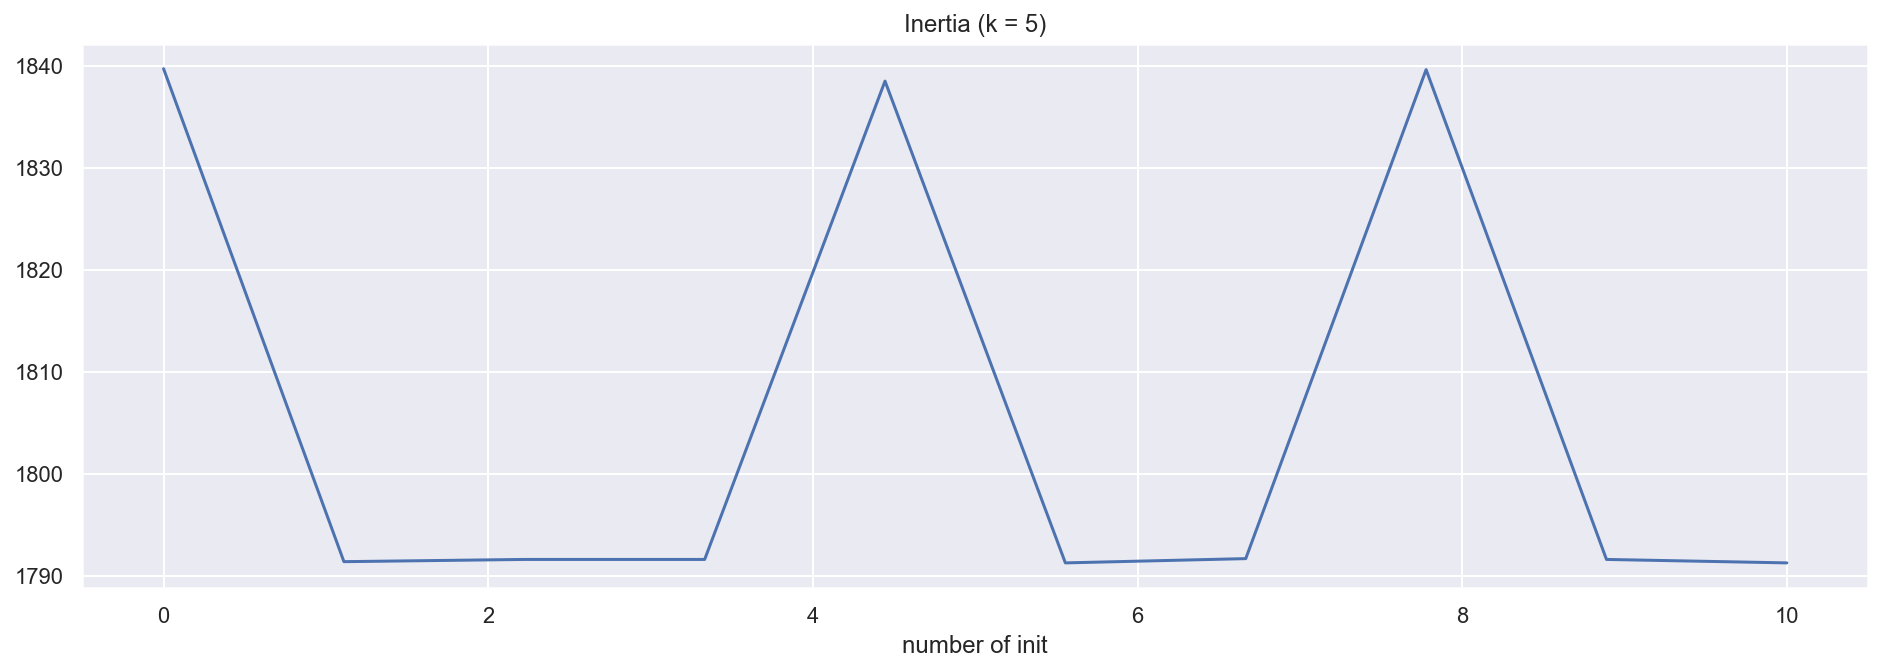

In [4]:
pr = ['price', 'carat', 'depth', 'table']

data1 = data[pr]
data1_norm = (data1 - data1.mean()) / (data1.std())

inertias_for_5, labels_for_5 = make_clusters(data1_norm, 5)
x = np.linspace(0, 10, 10) 

plt.figure(figsize=(16, 5))
plt.plot(x, inertias_for_5) 
plt.xlabel('number of init') 
plt.title('Inertia (k = 5)') 
plt.show()

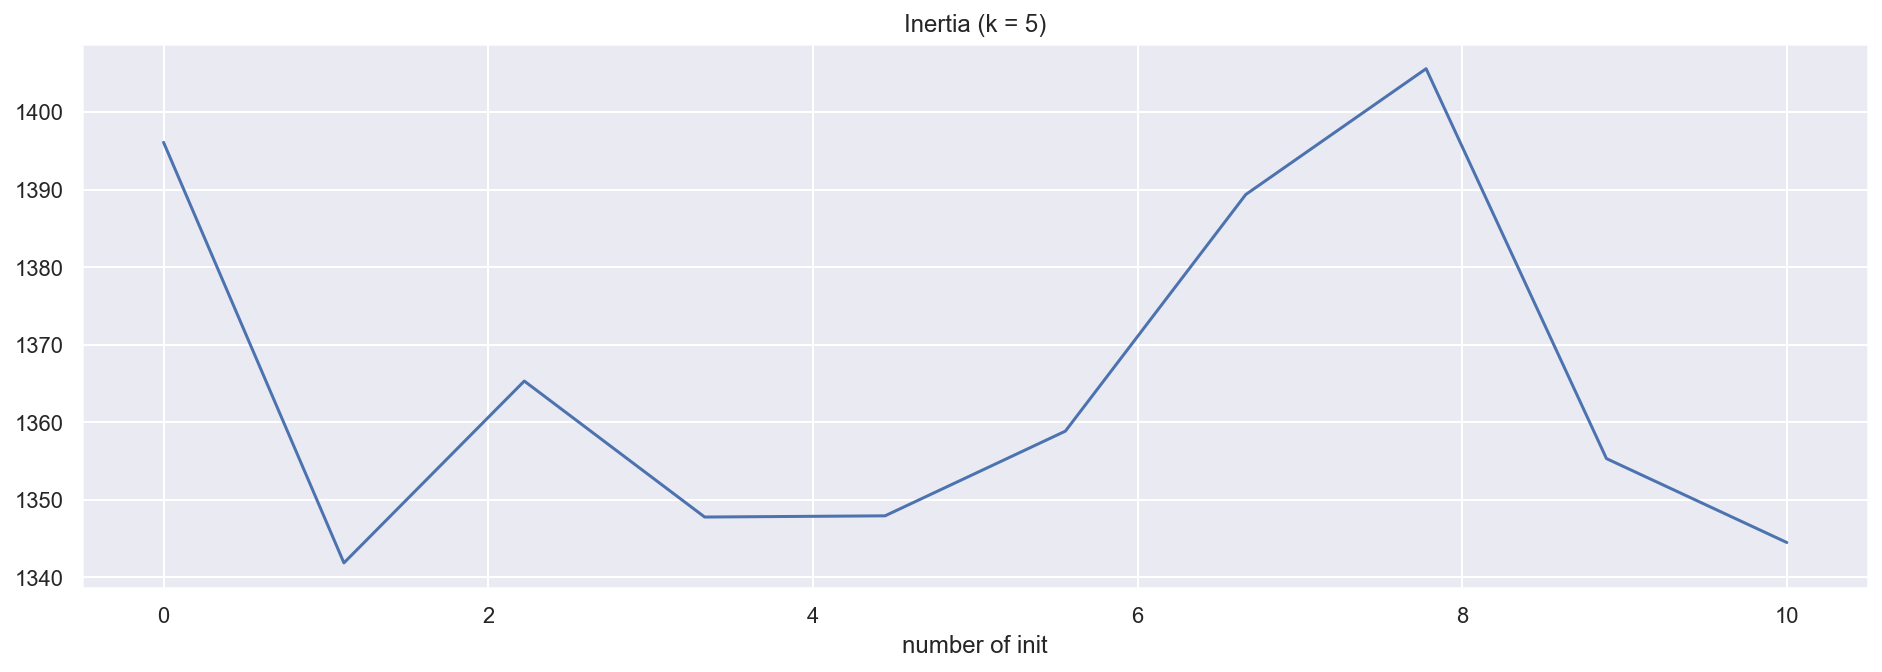

In [5]:
inertias_for_9, labels_for_9 = make_clusters(data1_norm, 9)
x = np.linspace(0, 10, 10) 

plt.figure(figsize=(16, 5))
plt.plot(x, inertias_for_9) 
plt.xlabel('number of init') 
plt.title('Inertia (k = 5)') 
plt.show()

In [6]:
def mean_cl(inertias, labels):
    opt_ind = np.argmin(inertias)
    opt_criterion = inertias[opt_ind]
    opt_label = labels[opt_ind]
    
    data1 = data[pr].copy(deep=True)
    data1.loc[:, 'cluster'] = opt_label
    cl_mean = data1.groupby('cluster').mean()
    cl_mean.loc['Grand mean', :] = data1.mean()
    return cl_mean

def std_cl(inertias, labels):
    opt_ind = np.argmin(inertias)
    opt_criterion = inertias[opt_ind]
    opt_label = labels[opt_ind]
    
    data1 = data[pr].copy(deep=True)
    data1.loc[:, 'cluster'] = opt_label
    
    cl = data1.groupby('cluster').mean()
    delta = (cl - data1.mean()) / data1.mean() * 100
    delta.loc[:, 'Number of objects'] = data1.groupby('cluster').size()
    return delta[pr + ['Number of objects']]

In [7]:
mean_cl(inertias_for_5, labels_for_5)

,price,carat,depth,table
cluster,,,,
0,388.383721,0.234767,59.901163,60.383721
1,436.127072,0.314530,62.245028,55.993370
2,379.276596,0.284628,62.552128,56.675532
3,430.747475,0.249242,62.024747,56.386364
4,430.253012,0.305422,60.568675,59.578313
Grand mean,419.293000,0.287610,61.779300,57.172100


In [8]:
std_cl(inertias_for_5, labels_for_5)

,price,carat,depth,table,Number of objects
cluster,,,,,
0,-7.371761,-18.372991,-3.040075,5.617462,86
1,4.014871,9.360032,0.753857,-2.061722,362
2,-9.543781,-1.036939,1.250949,-0.868550,188
3,2.731855,-13.340140,0.397297,-1.374335,198
4,2.613927,6.193000,-1.959597,4.208719,166


In [9]:
mean_cl(inertias_for_9, labels_for_9)

,price,carat,depth,table
cluster,,,,
0,420.683673,0.310612,60.963265,60.357143
1,438.000000,0.253830,62.224823,55.755319
2,384.911111,0.241556,59.211111,62.088889
3,406.087500,0.238250,61.215000,58.425000
4,373.421053,0.240132,62.514474,56.197368
5,439.362500,0.291500,59.895000,57.975000
6,387.160839,0.305944,62.551049,56.494406
7,436.051429,0.312286,62.598286,57.348571
8,440.111111,0.317778,61.896914,54.962346


In [10]:
std_cl(inertias_for_9, labels_for_9)

,price,carat,depth,table,Number of objects
cluster,,,,,
0,0.331671,7.997721,-1.320887,5.570974,98
1,4.461558,-11.745145,0.721152,-2.478098,141
2,-8.199967,-16.012811,-4.157038,8.599980,45
3,-3.149468,-17.162129,-0.913413,2.191454,80
4,-10.940308,-16.507917,1.190000,-1.704908,76
5,4.786510,1.352526,-3.050051,1.404356,80
6,-7.663415,6.374624,1.249203,-1.185359,143
7,3.996830,8.579575,1.325664,0.308667,175
8,4.965051,10.489127,0.190377,-3.865092,162
